In [1]:
import numpy as np
import seaborn as sn
import pandas as pd
from matplotlib import pyplot as plt

import os
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
cmap = sn.color_palette("viridis", 8, as_cmap=True)
from multiple_testing import generate_fake_data


In [2]:
import pickle
with open('states/nruns=30_T=300_N=200_n_jumps=10_level_bounds=2_min_gaps=0_partial_effect_ratio=1_heavy_tail=False_poission_corruption=False_J=0.8_staircase=False_RegX=True.pickle', 'rb') as pickle_file:
    content = pickle.load(pickle_file)
stored_selections, Y, real_jump_idces = content[0]

In [3]:
with open('states/temp_plots_p_index.pickle', 'rb') as pickle_file:
    pvals_list = pickle.load(pickle_file)

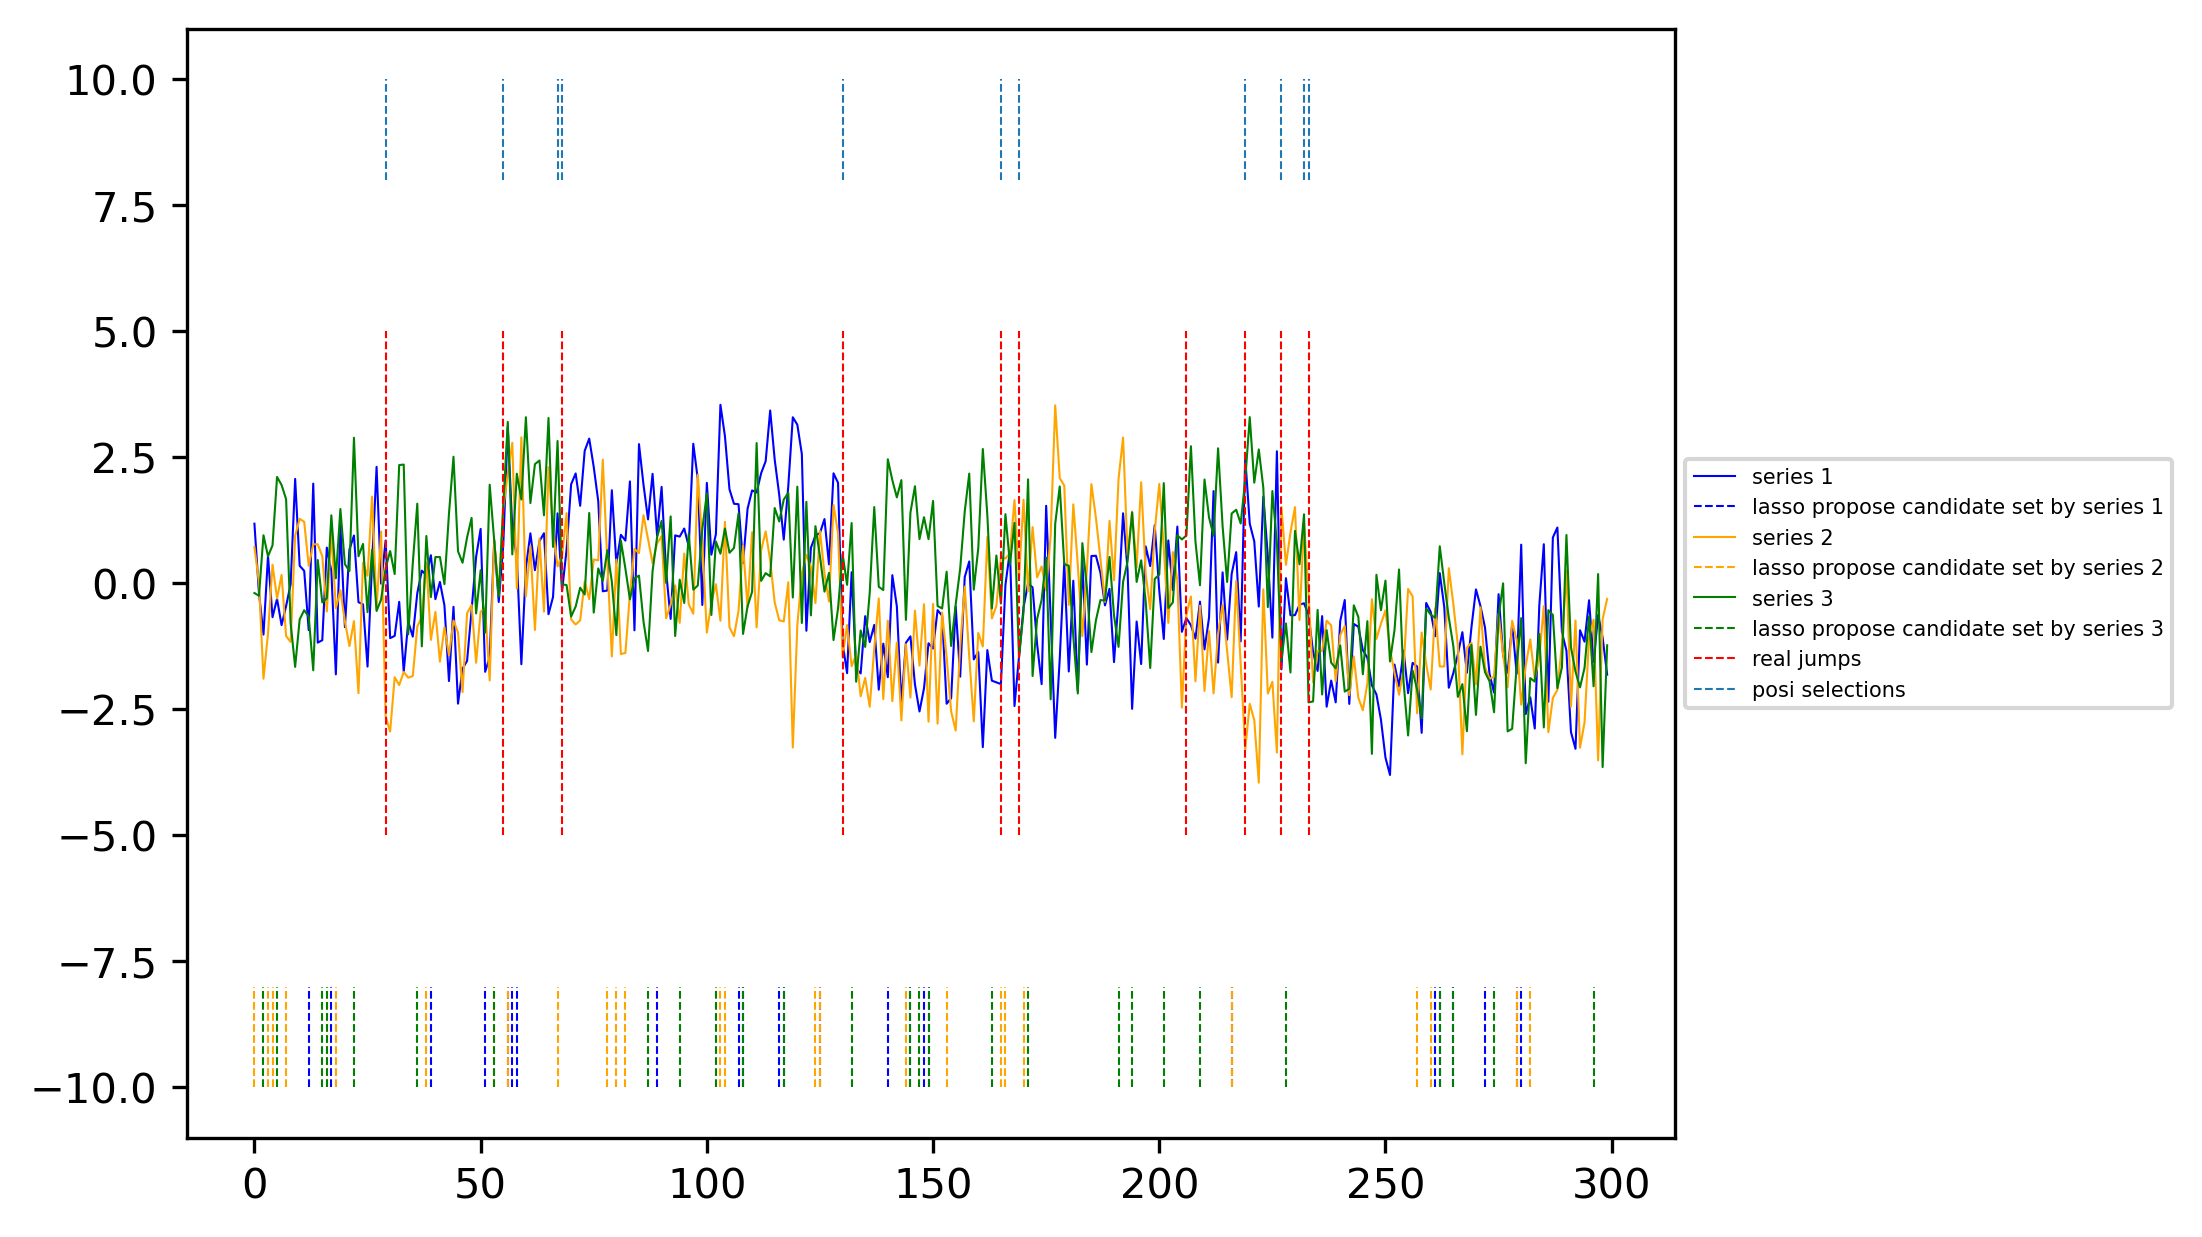

In [4]:
c = ['blue', 'orange','green']
idces = [2,3,4]
for i in range(3):
    plt.plot(Y[:,idces[i]], linewidth=0.5, c=c[i])
    plt.vlines(pvals_list[i], colors=c[i], ymin = -10, ymax = -8, linestyles='--', linewidth = 0.5)

plt.vlines(real_jump_idces, ymin=-5, ymax=5,colors='r', linestyles= '--', linewidth=0.5)
plt.vlines(stored_selections[0.05][0], ymin=8, ymax=10, linestyles= '--', linewidth=0.5)
plt.legend(['series 1', 'lasso propose candidate set by series 1','series 2','lasso propose candidate set by series 2', 'series 3',
            'lasso propose candidate set by series 3', 'real jumps', 'posi selections'], fontsize = 5,loc='center left', bbox_to_anchor=(1, 0.5))

### Plot 3

In [5]:
rst_df = pd.read_csv("results_poster/mean_result.csv")
rst_df["precision"] = rst_df["# correct selection"] / (
    rst_df["# correct selection"] + rst_df["# false selection"]
)

rst_df["recall"] = rst_df["# correct selection"] / (
    rst_df["# correct selection"] + rst_df["# ommited"]
)
def snr(a):
    return np.sqrt(a**2/3*10/300)

In [6]:
rst_df[
    (rst_df["level_bounds"] == 10)
    & (rst_df["N"] == 200)
    & (rst_df["partial_effect_ratio"] == 1)
]

,method,precision,recall,accuracy,Type II error,Type I error,# selected,# false selection,# correct selection,# ommited,rho,f1,SNR,posi_gamma,J,T,N,level_bounds,partial_effect_ratio,staircase
1470,posi,0.961538,1.00,0.998667,0.00,0.033333,10.4,0.4,10.0,0.0,0.111108,0.981818,313.269936,0.001,0.8,300.0,200.0,10.0,1.0,False
1471,posi with JC algo,0.620253,0.98,0.979333,0.02,0.321245,15.8,6.0,9.8,0.2,0.110301,0.790303,313.269936,0.001,0.8,300.0,200.0,10.0,1.0,False
1472,rdp_union,0.228972,0.98,0.889333,0.02,0.768466,42.8,33.0,9.8,0.2,NaN,0.373992,313.269936,0.001,0.8,300.0,200.0,10.0,1.0,False
1473,rdp_intersection,NaN,0.00,0.966667,1.00,NaN,0.0,0.0,0.0,10.0,NaN,0.000000,313.269936,0.001,0.8,300.0,200.0,10.0,1.0,False
1474,rdp_majority_voting,1.000000,0.70,0.990000,0.30,0.000000,7.0,0.0,7.0,3.0,NaN,0.821895,313.269936,0.001,0.8,300.0,200.0,10.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,panel_rdp,0.777778,0.14,0.970000,0.86,0.133333,1.8,0.4,1.4,8.6,NaN,0.232168,313.269936,0.050,0.8,300.0,200.0,10.0,1.0,False
1536,bonf_selection,0.909091,1.00,0.996667,0.00,0.087879,11.0,1.0,10.0,0.0,NaN,0.953247,313.269936,0.050,0.8,300.0,200.0,10.0,1.0,False
1537,bonf with JC algo,0.590361,0.98,0.976667,0.02,0.357143,16.6,6.8,9.8,0.2,NaN,0.765782,313.269936,0.050,0.8,300.0,200.0,10.0,1.0,False
1538,sbs,0.853659,0.35,0.976333,0.65,0.145000,4.1,0.6,3.5,6.5,NaN,0.496190,313.269936,0.050,0.8,300.0,200.0,10.0,1.0,False


In [7]:
rst_df.posi_gamma.unique()

array([0.001, 0.002, 0.005, 0.008, 0.01 , 0.02 , 0.05 ])

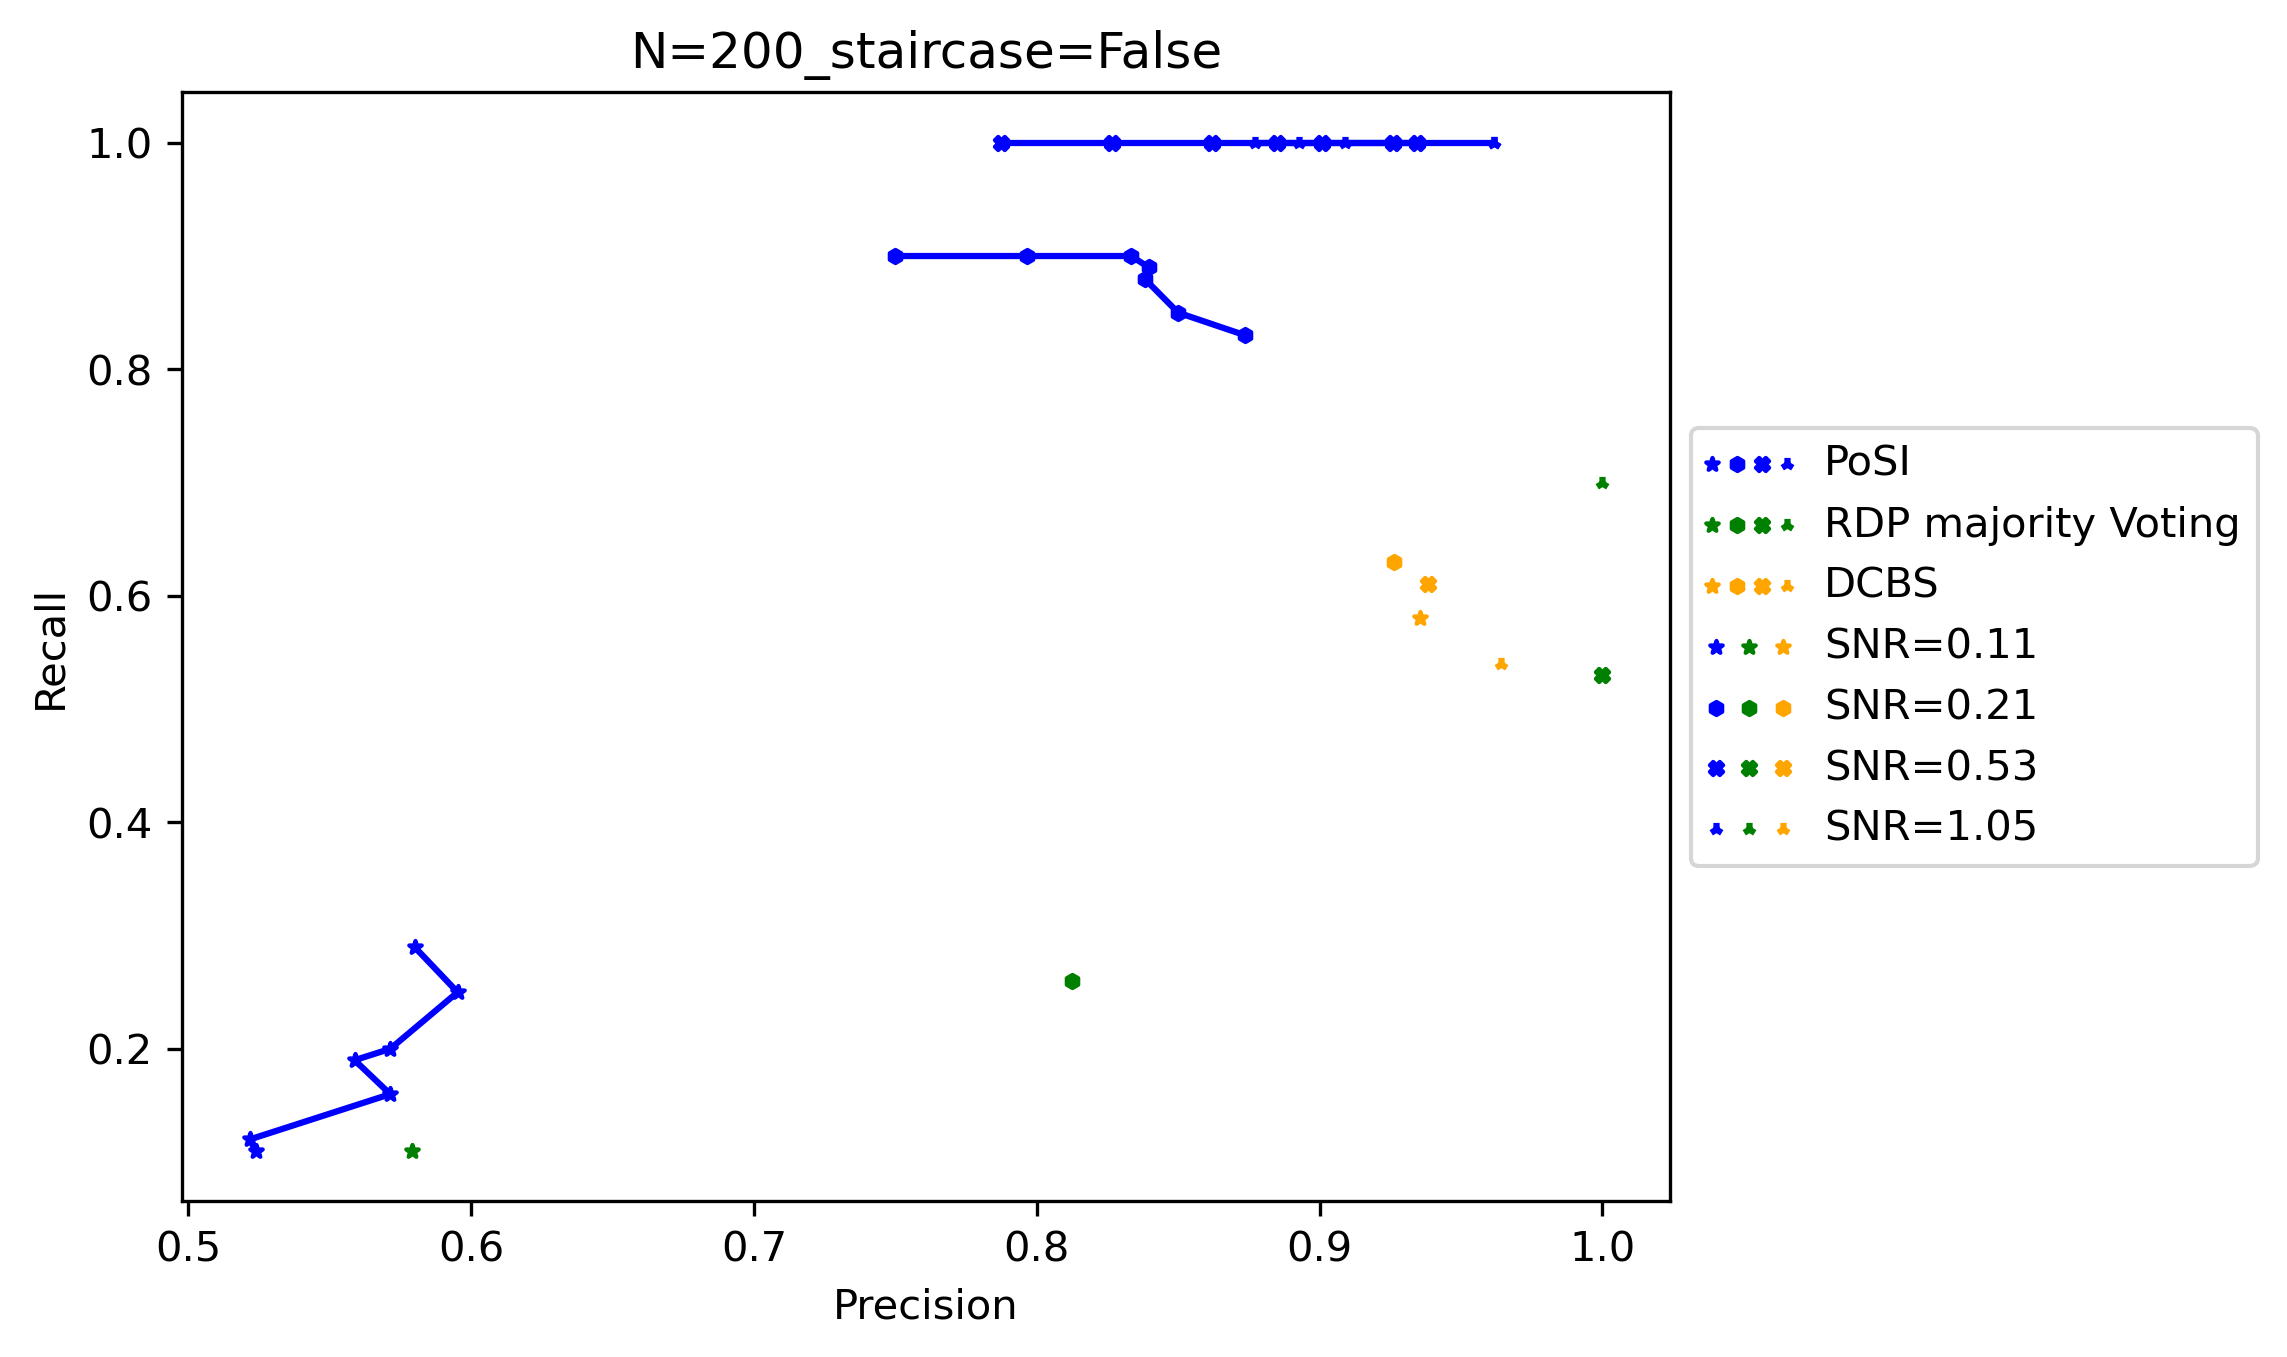

In [8]:
from matplotlib.legend_handler import HandlerTuple

lvbds = [1, 2, 5,10]
markers = ["*", "h", "X", "2"]
snrs = [snr(b) for b in lvbds]
axes = []
for l, lvbd in enumerate(lvbds):
    colors = ["blue", "green", "orange"]

    n = 200
    stair = rst_df.staircase[0]
    tmp = rst_df[
        (rst_df["level_bounds"] == lvbd)
        & (rst_df["N"] == n)
        & (rst_df["partial_effect_ratio"] == 1)
    ]
    legend = []

    for i, method in enumerate(["posi", "rdp_majority_voting", "dcbs"]):
        x = []
        y = []
        legend.append(method)
        for gamma in rst_df.posi_gamma.unique():
            x.append(
                tmp[(tmp["posi_gamma"] == gamma) & (tmp["method"] == method)][
                    "precision"
                ].values[0]
            )
            y.append(
                tmp[(tmp["posi_gamma"] == gamma) & (tmp["method"] == method)][
                    "recall"
                ].values[0]
            )
        # print(method, x,y)

        if method == "posi":
            ax = plt.plot(x, y, color=colors[i])
            # axes.append(ax)
            ax = plt.scatter(x, y, s=10, color=colors[i], marker=markers[l])
            axes.append(ax)
        else:
            # for non posi, fix one to plot for each fwer level
            ax = plt.scatter(x[0], y[0], s=10, color=colors[i], marker=markers[l])
            axes.append(ax)


plt.xlabel("Precision")
plt.ylabel("Recall")
# plt.legend()


plt.legend(
    [
        (axes[0], axes[3], axes[6], axes[9]),
        (axes[1], axes[4], axes[7], axes[10]),
        (axes[2], axes[5], axes[8], axes[11]),
        (axes[0], axes[1], axes[2]),
        (axes[3], axes[4], axes[5]),
        (axes[6], axes[7], axes[8]),
        (axes[9], axes[10], axes[11]),
    ],
    ["PoSI", "RDP majority Voting", "DCBS"] + [f"SNR={v:.2f}" for v in snrs],
    handler_map={tuple: HandlerTuple(ndivide=None)},
    fontsize=10,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)
# plt.title(f"bound={lvbd}_N={n}_staircase={stair}")


plt.title(f"N={n}_staircase={stair}")
plt.show()

### Plot 2

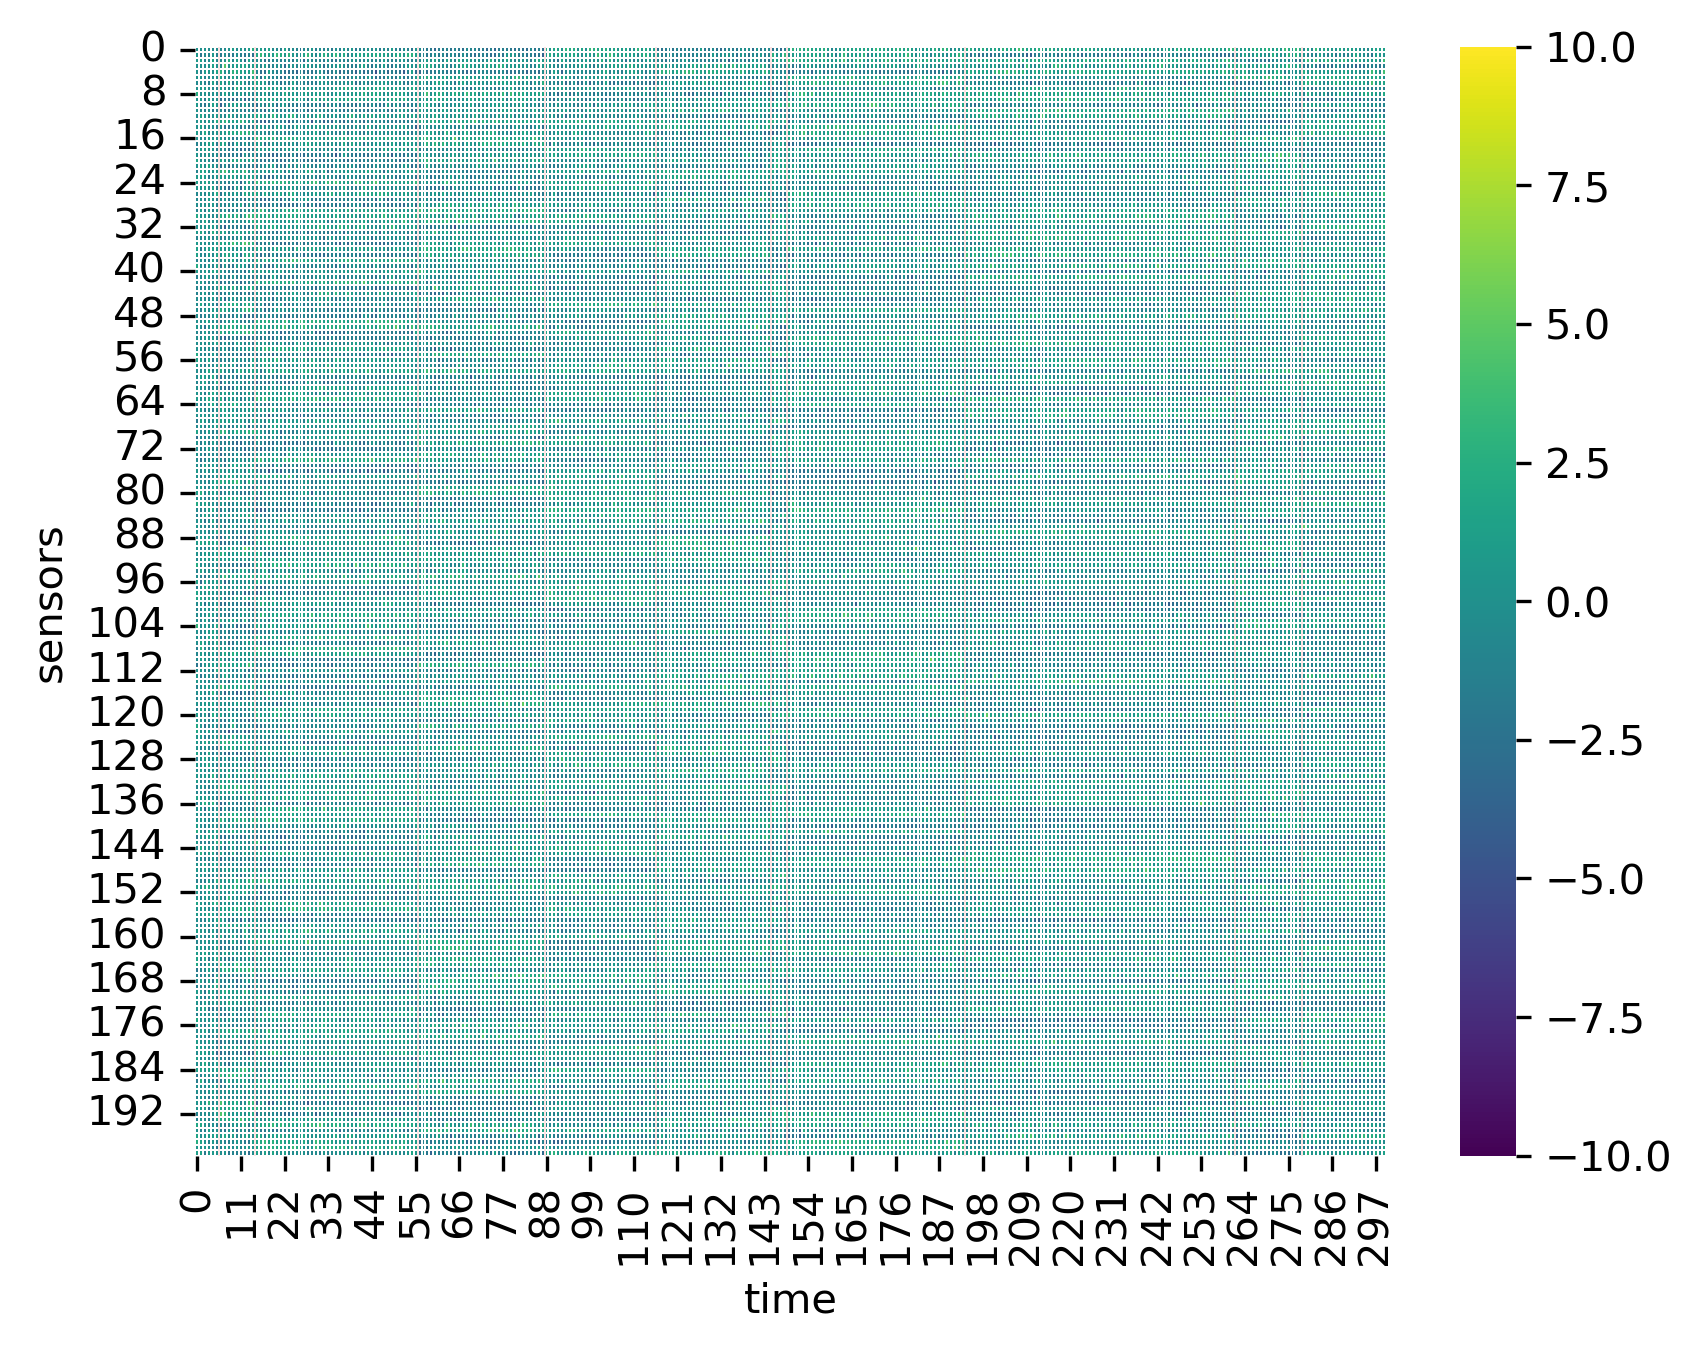

In [9]:
cmap = sn.color_palette("viridis", 8, as_cmap=True)
ax = sn.heatmap(Y.T, cmap = cmap, vmin = -10, vmax =10,linewidths=0.1, linecolor='white')
ax.set_xlabel("time")
ax.set_ylabel("sensors")

ax.vlines(real_jump_idces, *ax.get_ylim(), linestyles = 'solid', linewidths = 0.05, color = 'red')

In [10]:
with open(
    f"states/temp_plots_p_full.pickle",
    "rb",
) as pickle_file:
    content = pickle.load(pickle_file)

In [11]:
pv_array = np.array(content)

Text(0.5, 1.0, 'pvalue')

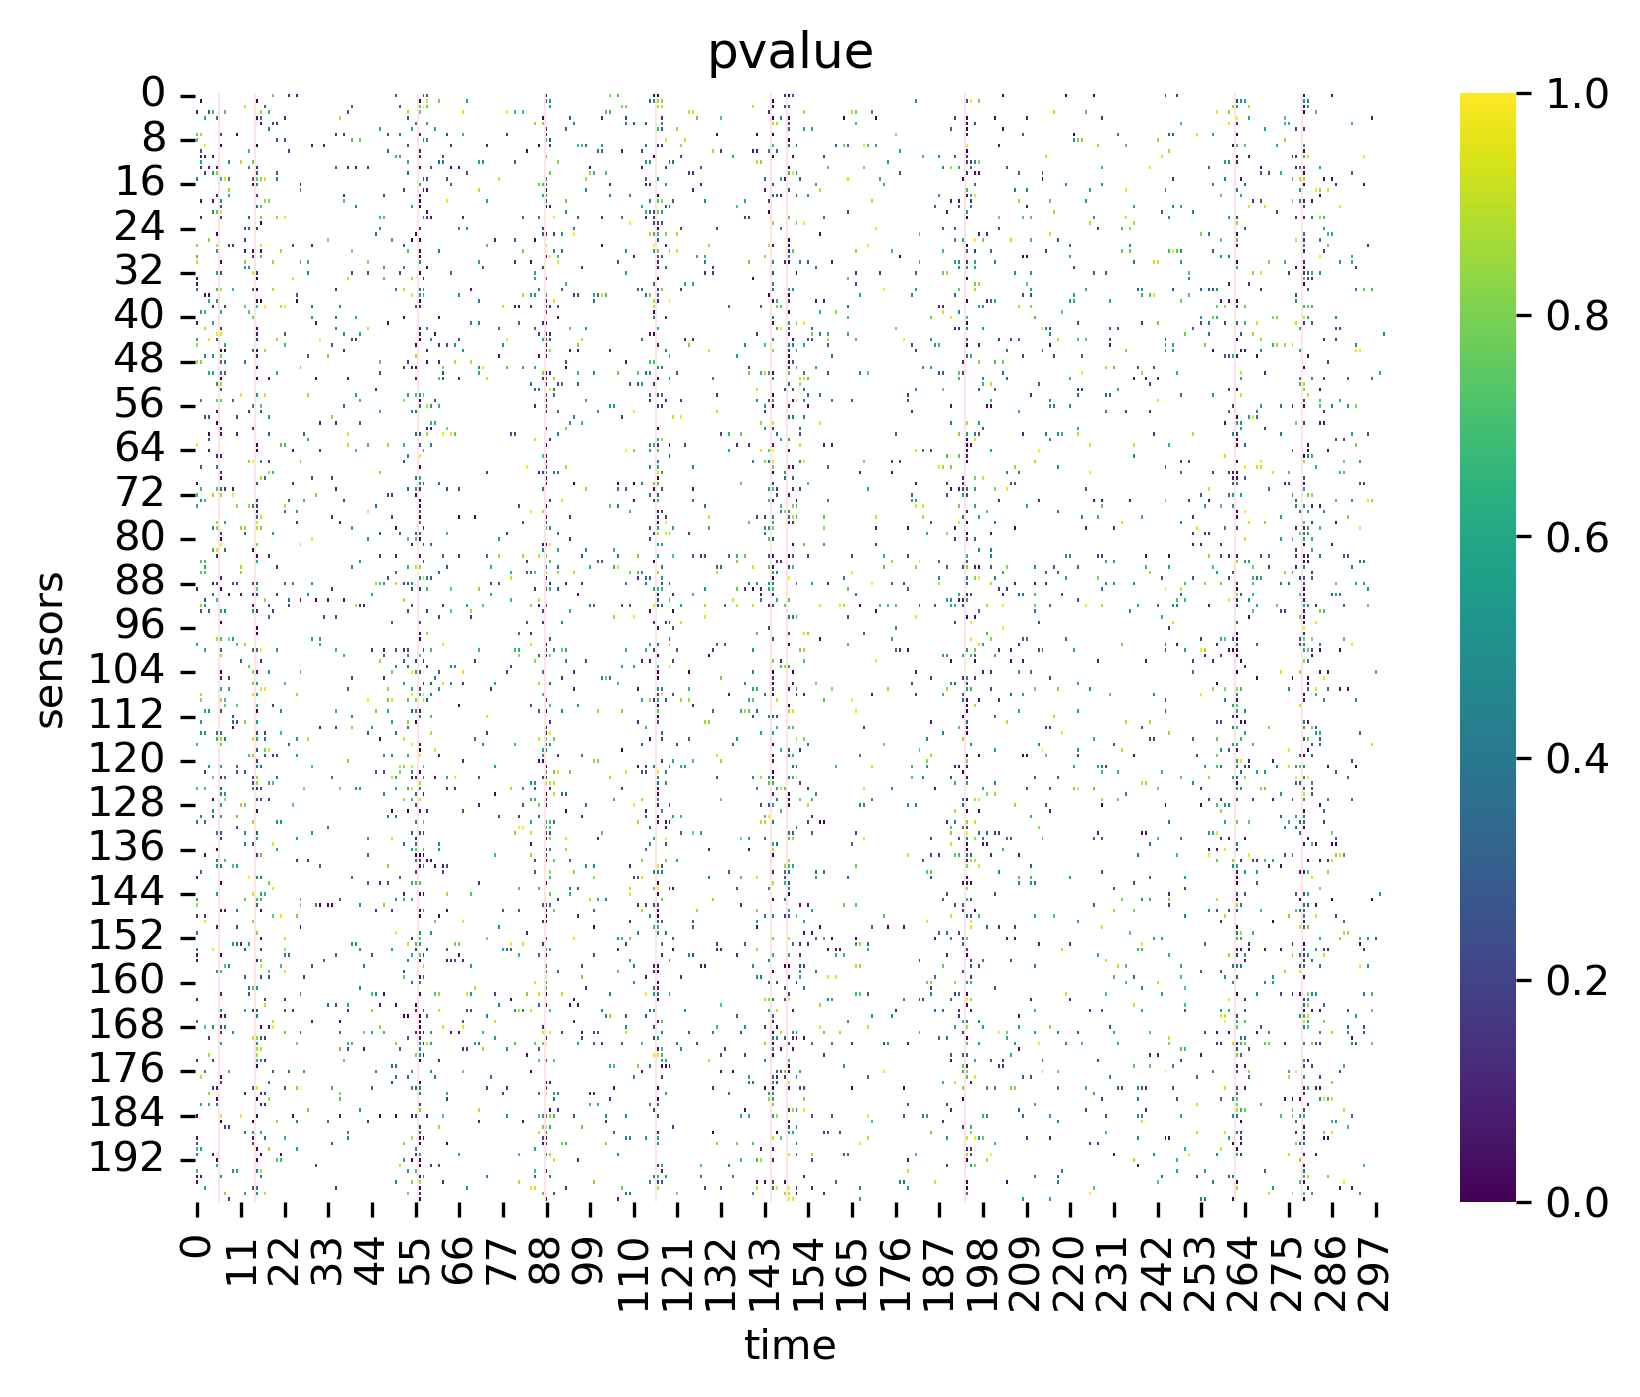

In [12]:
#dark
# cmap = sn.color_palette("viridis_r", 8, as_cmap=True)
# cmap.set_bad('black')
#light
cmap = sn.color_palette("viridis", 8, as_cmap=True)
ax = sn.heatmap(pv_array, cmap = cmap, vmin = 0, vmax=1,linewidths=0.1, linecolor='white')
ax.set_xlabel("time")
ax.set_ylabel("sensors")

ax.vlines(real_jump_idces, *ax.get_ylim(), linestyles = 'solid', linewidths = 0.05, color = 'red')
plt.title('pvalue')